In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style = 'darkgrid')

In [2]:
m = pd.read_csv('input/mort.csv')
list(m.columns)

['Location',
 'FIPS',
 'Category',
 'Mortality Rate, 1980*',
 'Mortality Rate, 1980* (Min)',
 'Mortality Rate, 1980* (Max)',
 'Mortality Rate, 1985*',
 'Mortality Rate, 1985* (Min)',
 'Mortality Rate, 1985* (Max)',
 'Mortality Rate, 1990*',
 'Mortality Rate, 1990* (Min)',
 'Mortality Rate, 1990* (Max)',
 'Mortality Rate, 1995*',
 'Mortality Rate, 1995* (Min)',
 'Mortality Rate, 1995* (Max)',
 'Mortality Rate, 2000*',
 'Mortality Rate, 2000* (Min)',
 'Mortality Rate, 2000* (Max)',
 'Mortality Rate, 2005*',
 'Mortality Rate, 2005* (Min)',
 'Mortality Rate, 2005* (Max)',
 'Mortality Rate, 2010*',
 'Mortality Rate, 2010* (Min)',
 'Mortality Rate, 2010* (Max)',
 'Mortality Rate, 2014*',
 'Mortality Rate, 2014* (Min)',
 'Mortality Rate, 2014* (Max)',
 '% Change in Mortality Rate, 1980-2014',
 '% Change in Mortality Rate, 1980-2014 (Min)',
 '% Change in Mortality Rate, 1980-2014 (Max)']

In [3]:
tokeep = ['Location',
 'FIPS',
 'Category',
 'Mortality Rate, 1980*',
 'Mortality Rate, 1985*',
 'Mortality Rate, 1990*',
 'Mortality Rate, 1995*',
 'Mortality Rate, 2000*',
 'Mortality Rate, 2005*',
 'Mortality Rate, 2010*',
 'Mortality Rate, 2014*',]

m = m[(m.Location.str.contains(',') == True)]
m.reset_index(drop=True, inplace=True)


In [4]:
x = 0
while x < len(m.columns):
    if m.columns[x] not in tokeep:
        m = m.drop(m.columns[x],1)
    x=x+1
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65982 entries, 0 to 65981
Data columns (total 20 columns):
Location                                       65982 non-null object
FIPS                                           65982 non-null float64
Category                                       65982 non-null object
Mortality Rate, 1980*                          65982 non-null float64
Mortality Rate, 1980* (Max)                    65982 non-null float64
Mortality Rate, 1985*                          65982 non-null float64
Mortality Rate, 1985* (Max)                    65982 non-null float64
Mortality Rate, 1990*                          65982 non-null float64
Mortality Rate, 1990* (Max)                    65982 non-null float64
Mortality Rate, 1995*                          65982 non-null float64
Mortality Rate, 1995* (Max)                    65982 non-null float64
Mortality Rate, 2000*                          65982 non-null float64
Mortality Rate, 2000* (Max)                    65982 

In [5]:
m['County'] = ''
m['State'] = ''

county = []
state = []

x=0
while x<len(m):
    p = m['Location'][x].index(',')
    county.append(m['Location'][x][:p])
    state.append(m['Location'][x][p+2:])
    x=x+1
    
m['County'] = county
m['State'] = state
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65982 entries, 0 to 65981
Data columns (total 22 columns):
Location                                       65982 non-null object
FIPS                                           65982 non-null float64
Category                                       65982 non-null object
Mortality Rate, 1980*                          65982 non-null float64
Mortality Rate, 1980* (Max)                    65982 non-null float64
Mortality Rate, 1985*                          65982 non-null float64
Mortality Rate, 1985* (Max)                    65982 non-null float64
Mortality Rate, 1990*                          65982 non-null float64
Mortality Rate, 1990* (Max)                    65982 non-null float64
Mortality Rate, 1995*                          65982 non-null float64
Mortality Rate, 1995* (Max)                    65982 non-null float64
Mortality Rate, 2000*                          65982 non-null float64
Mortality Rate, 2000* (Max)                    65982 

In [6]:
n = pd.melt(m, id_vars = ['Location','FIPS','Category','County','State'], value_vars = ['Mortality Rate, 1980*',
                                                                                    'Mortality Rate, 1985*',
                                                                                   'Mortality Rate, 1990*',
                                                                                   'Mortality Rate, 1995*',
                                                                                   'Mortality Rate, 2000*',
                                                                                   'Mortality Rate, 2005*',
                                                                                   'Mortality Rate, 2010*',
                                                                                   'Mortality Rate, 2014*',])
n=n.rename(columns = {'value':'Mortality Rate'})

x=0
year = []
while x<len(n):
    year.append(n['variable'][x][16:20])
    x=x+1
    
n['Year'] = year
n.Year = n.Year.astype(float)
n=n.drop('variable',1)

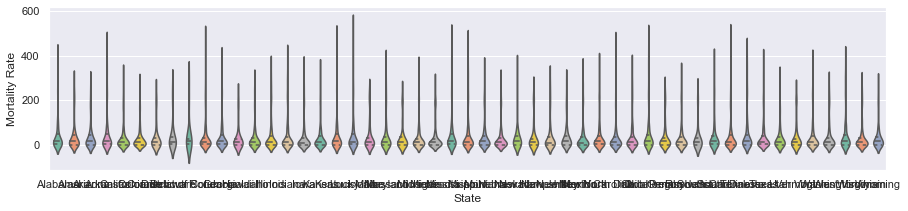

In [7]:
y = sorted(list(n['State'].unique()))

plt.figure(figsize = (15,3))
sns.violinplot(y = 'Mortality Rate', x = 'State', data = n[(n['Year'] == 2014)], inner = 'quartile', 
               palette = 'Set2', order = y)

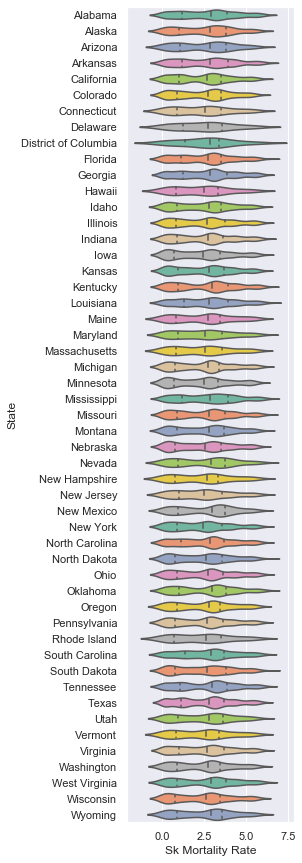

In [8]:
n['Sk Mortality Rate']= np.log1p(n['Mortality Rate'])

y = sorted(list(n['State'].unique()))

plt.figure(figsize = (3,15))
sns.violinplot(x = 'Sk Mortality Rate', y = 'State', data = n[(n['Year'] == 2014)], inner = 'quartile', 
               palette = 'Set2', order = y)

In [19]:
o = pd.pivot_table(n[(n['Year'] == 2014)], values = 'Mortality Rate', index = ['County','Year','State'], 
                   columns = 'Category', aggfunc = np.mean)
    

ocols = ['Cardiovascular',
 'Chronic resp',
 'Chronic liver',
 'Diabetes',
 'Diarrhea',
 'Digestive diseases',
 'Non Natural',
 'HIV/AIDS and TB',
 'Maternal disorders',
 'Mental disorders',
 'Musculoskeletal disorders',
 'Tropical diseases',
 'Neonatal disorders',
 'Neoplasms',
 'Neurological disorders',
 'Nutritional deficiencies',
 'Other communicable',
 'Other non-communicable',
 'Violence',
 'Transport injuries',
 'Unintentional injuries']


o.columns = ocols
o.head(100)

,,,Cardiovascular,Chronic resp,Chronic liver,Diabetes,Diarrhea,Digestive diseases,Non Natural,HIV/AIDS and TB,Maternal disorders,Mental disorders,...,Tropical diseases,Neonatal disorders,Neoplasms,Neurological disorders,Nutritional deficiencies,Other communicable,Other non-communicable,Violence,Transport injuries,Unintentional injuries
County,Year,State,,,,,,,,,,,,,,,,,,,,,
Abbeville County,2014.0,South Carolina,252.42,59.27,20.16,57.49,30.22,15.86,0.06,1.96,0.52,11.14,...,0.05,5.11,216.66,116.88,2.55,1.43,8.11,21.92,21.34,23.24
Acadia Parish,2014.0,Louisiana,363.23,56.09,19.36,68.58,48.68,14.86,0.09,3.18,0.68,13.62,...,0.09,4.59,266.67,124.63,2.44,1.53,8.60,31.00,29.63,23.57
Accomack County,2014.0,Virginia,272.88,60.31,17.89,69.63,39.83,14.09,0.08,3.24,0.50,13.53,...,0.05,4.74,254.18,135.23,1.28,1.61,7.41,24.50,26.82,21.88
Ada County,2014.0,Idaho,211.01,54.67,15.20,42.20,17.79,15.07,0.03,0.56,0.26,10.58,...,0.06,2.15,171.72,120.21,1.36,1.18,5.80,18.82,10.20,17.30
Adair County,2014.0,Iowa,270.87,47.06,12.03,51.62,46.29,17.04,0.05,0.38,0.27,6.46,...,0.06,2.07,194.81,83.72,0.91,0.96,5.58,17.58,22.11,24.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Assumption Parish,2014.0,Louisiana,313.35,43.00,15.38,79.16,33.09,14.61,0.06,2.31,0.51,9.74,...,0.11,4.51,229.06,76.66,2.37,1.39,8.93,17.40,30.97,20.63
Atascosa County,2014.0,Texas,291.46,49.80,26.87,75.60,26.76,13.83,0.04,1.59,0.34,8.18,...,0.06,2.70,189.19,85.38,2.09,1.34,6.71,24.10,23.53,21.77
Atchison County,2014.0,Kansas,265.04,75.62,16.05,75.38,25.95,16.54,0.08,0.60,0.39,9.17,...,0.06,2.64,223.76,94.42,1.74,1.05,7.03,20.17,21.79,24.34


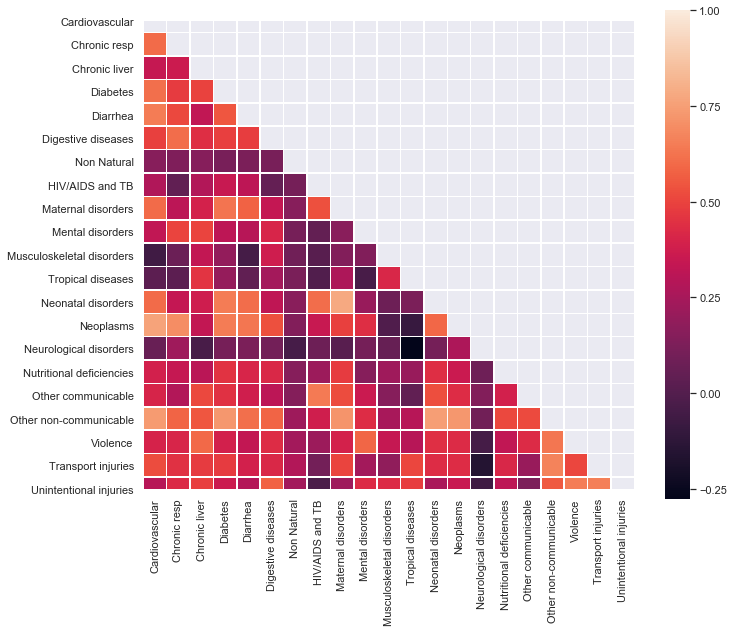

In [10]:
corr = o.corr()
fg, ax = plt.subplots(figsize = (11,9))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask, linewidths = .5, square = True)

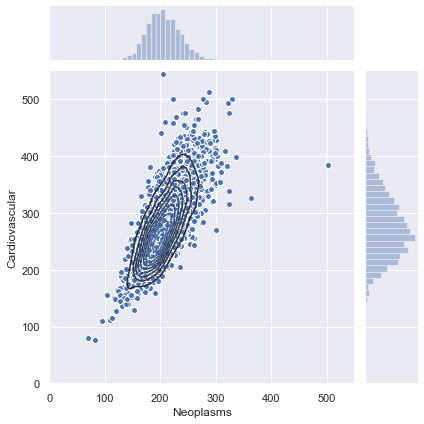

In [11]:
p = (sns.jointplot(o['Neoplasms'], o['Cardiovascular'],
                  stat_func=None,edgecolor="w",xlim = (0,550), ylim = (0,550))
     .plot_joint(sns.kdeplot, zorder = 1, n_levels = 10))

/Users/elimenas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/elimenas/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:993: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  obj = getattr(obj, self.name)._getitem_axis(key, axis=axis)


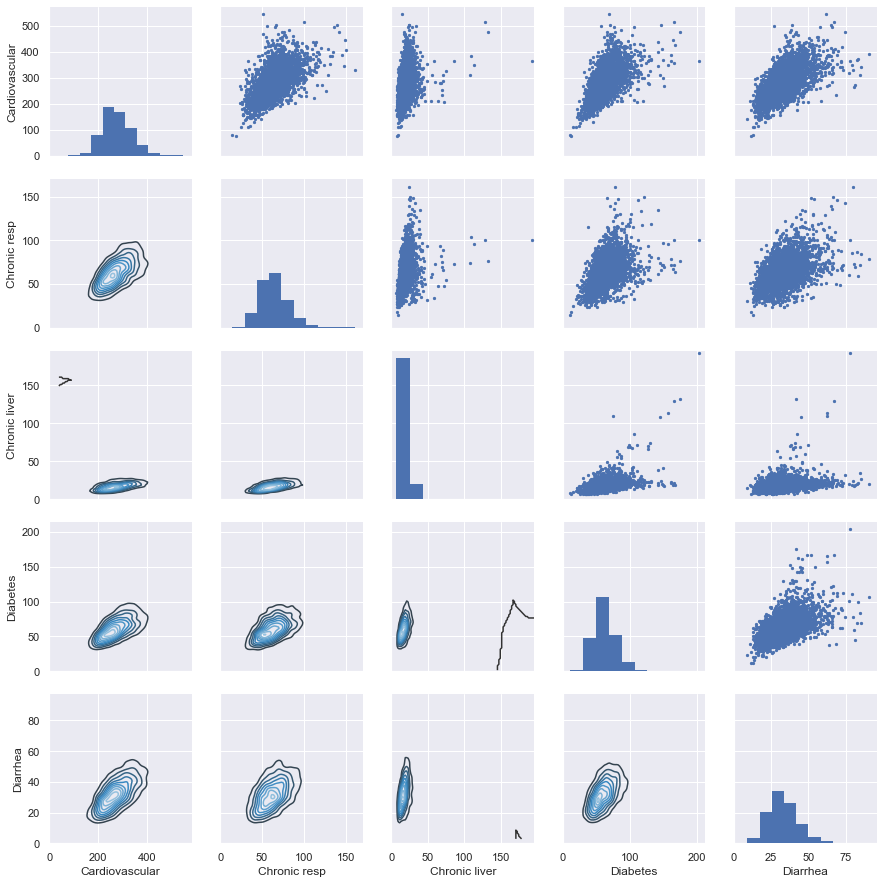

In [12]:
p=o.ix[:,:5]
sns.set(style = 'darkgrid')
g = sns.PairGrid(p)
g.map_upper(plt.scatter, s = 5)
g.map_diag(plt.hist, lw = 0, edgecolor = 'w')
g.map_lower(sns.kdeplot, cmap = 'Blues_d')

g.set(ylim = (0,None))
g.set(xlim = (0,None))

In [13]:
cardio = n[(n['Category'] == 'Cardiovascular diseases')]
cardio = cardio[['Year','State','Mortality Rate']]
cardio = cardio.groupby(['Year','State']).mean()
cardio.reset_index(level=0, inplace=True)
cardio.reset_index(level=0, inplace=True)
cardio.head()

,State,Year,Mortality Rate
0,Alabama,1980.0,526.954328
1,Alaska,1980.0,480.126207
2,Arizona,1980.0,411.335333
3,Arkansas,1980.0,522.188400
4,California,1980.0,455.754483


/Users/elimenas/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


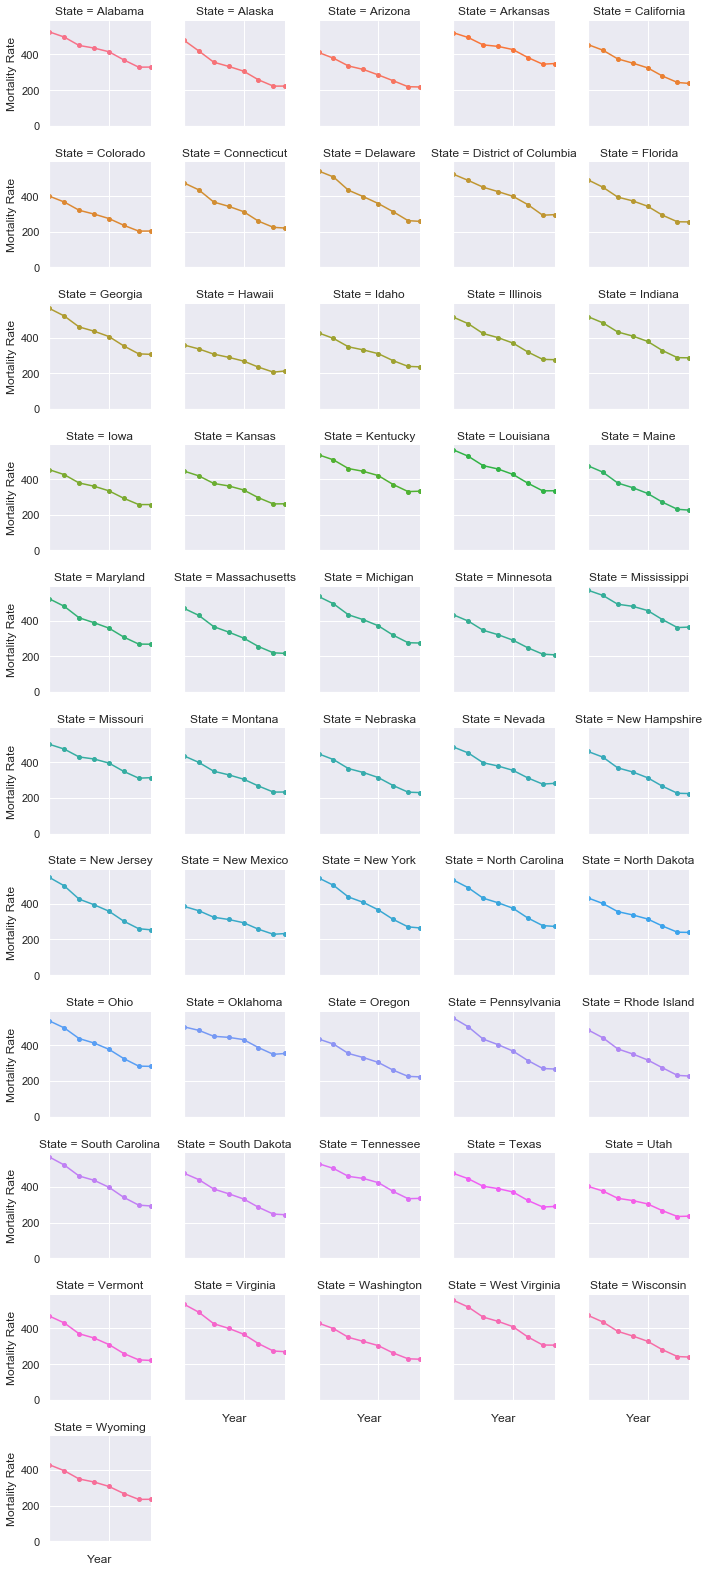

In [14]:
grid = sns.FacetGrid(cardio, col = 'State', hue = 'State', col_wrap = 5, size = 2)

grid.map(plt.plot, 'Year', 'Mortality Rate',ms = 4, marker ='o')

grid.set(xlim=(1980, 2014), ylim = (0,None))

grid.set_xticklabels(rotation = 45)

grid.fig.tight_layout(w_pad = 1)

In [15]:
cardio = pd.pivot_table(cardio, values = 'Mortality Rate', index = ['State'], 
                   columns = 'Year', aggfunc = np.mean)

cardio.reset_index(level=0, inplace=True)

In [16]:
cardio.columns = ['State','One','Two','Three','Four','Five','Sx','Seven','Eight']
#changing columns because I could not call when the column name was a year number

In [17]:
cardio['Delta'] = ''
delta = []
x=0
while x < len(cardio):
    y = cardio['One'][x] 
    z = cardio['Eight'][x]
    delta.append((z-y)/y)
    
    x=x+1

cardio['Delta'] = delta
    
cardio.head()

,State,One,Two,Three,Four,Five,Sx,Seven,Eight,Delta
0,Alabama,526.954328,498.024179,450.712090,436.220896,415.470448,369.677612,328.869104,329.501343,-0.374706
1,Alaska,480.126207,419.686897,356.804828,333.187241,306.607241,257.860690,222.537586,222.845172,-0.535861
2,Arizona,411.335333,379.146667,335.766667,316.097333,285.434000,252.837333,219.314000,217.806667,-0.470489
3,Arkansas,522.188400,495.439067,453.963333,445.558667,427.723467,383.091867,345.631067,349.178400,-0.331317
4,California,455.754483,424.305345,375.381207,351.722759,325.205517,279.154655,243.175172,237.626897,-0.478608


/Users/elimenas/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


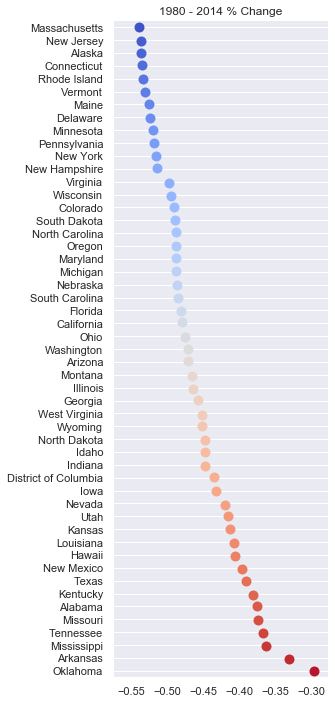

In [18]:
sns.set(style="darkgrid")

#fg, ax = plt.subplots(figsize = (11,9))

g = sns.PairGrid(cardio.sort_values(by = 'Delta', ascending = True), x_vars = 'Delta', y_vars = 'State', size = 10, aspect = .4)

g.map(sns.stripplot, size = 10, orient = 'h', palette = 'coolwarm', edgecolor = 'w')

g.set(xlabel='', ylabel='')

titles = ['1980 - 2014 % Change']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    ax.xaxis.grid(False)
    ax.yaxis.grid(True)